In [2]:
# show figures inline in the notebook
%matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np               # Import Numerical Python
import scipy.constants as const
from IPython.core.display import display, HTML #Import HTML for formatting output

# NOTE: Uncomment following lines ONLY if you are not using installation via pip
# import sys, os
# rootDir = '/path/to/arc/directory' # e.g. '/Users/Username/Desktop/ARC-Alkali-Rydberg-Calculator'
# sys.path.insert(0,rootDir)

from arc import *                 #Import ARC (Alkali Rydberg Calculator)

In [21]:
#Declare atom variables
cs=Caesium() #Cesium has 55 electrons w/ valence 7S 
rb=Rubidium() #Rubidium has 37 electrons w/ valences 6S
cs_gnd=9
rb_gnd=12
TOTAL_STATES = 250
POT = 20000000 #20MHz

atom = rb
atom_gnd = rb_gnd
name = "Caesium"
TEMP = 1

In [22]:
#Electron state generator for use with the ARC python package
#Given a Z, this class generates the list of occupied electron states for in input to the ARC energy level calculator

class State:
    
    #Definition of the principal QN, angular QN, magnetic QN, and spin QN
    def __init__(self,n,l,j,mj):
        self.n = n
        self.l = int(l)
        self.m = np.linspace(0,l,num= l+1)
        
        if j:
            self.j = j
        else:
            if self.l == 0:
                self.j = [.5]
            else:
                self.j = np.linspace(np.absolute(l-.5),l+.5,num=2)
        if mj:
            self.mj = mj
        
        else:
            self.mj = [[jj,None] for jj in self.j]

            for jj in self.mj:
                jj[1] = np.linspace(-jj[0],jj[0],num=(2*jj[0]+1))
            
class Transition:
    
    def __init__(self,s1,s2,atom,j):
        if not j:
            j = s2.j
        self.s1 = s1
        self.s2 = s2
        self.wvln = atom.getTransitionWavelength(s1.n,s1.l,s1.j,s2.n,s2.l,j)
        self.time = atom.getStateLifetime(s2.n,s2.l,j,0)
        self.rate = atom.getTransitionRate(s1.n,s1.l,s1.j,s2.n,s2.l,j,0)
        self.dipole = atom.getDipoleMatrixElement(s1.n,s1.l,s1.j,s1.mj,s2.n,s2.l,j,j,1)
        
#Electron state generating class
class ElectronStates:

    def aufbau(self,n,l,e_list):

        e_list.append(State(n,l,None,None))
        self.ec -= 2*l+1
        
        #Conditionally recurses or returns remaining electron counts
        if l != 0:
            return self.aufbau(n+1,l-1,e_list)
        else:
            return self.ec
                
    
    #Class constructor for electron state generating class
    def __init__(self,Z,e_list):

        self.occ_n = []
        self.Z = Z
        self.ec = Z
        n=1
        l=0
         
        while self.ec > 0:

            self.aufbau(n,l,e_list)
            
            if (n+l)%2 == 0 and n < 5:
                l+=1
            else:
                n+=1




In [25]:
#TRANSITION INFO

trans_dict={}
pqn = {}


def calcPower(elemSum,wvln):
    NA = .5 #Typical numerical aperture
    return (2*const.Planck*np.sqrt(POT*const.c/const.pi)*(wvln/NA)**2)/sqrt(elemSum)

def calcDipoleDetuningSum(trans,wvln):
    return (trans.dipole**2./np.absolute((1./trans.wvln)-(1./wvln)))

def createSpectrum(ground,wavelengths,states,atom):
    print(ground)
    power = []
    elemSum = 0
    for wvln in wavelengths:
        elemSum=0
        for st in states:
            if not (ground.n < st.n and ground.l==st.l) and not ground.n > st.n \
            and not (ground.n == st.n and ground.l >= st.l):
                for j in st.j:
                    trans = Transition(ground,st,atom,j)
                    if trans.dipole != 0.0:
                        print("From: " +str(ground.n)+str(ground.l)+str(ground.j) + " to " +str(st.n)+str(st.l)+str(j))
                        print("Wvln: " + str(trans.wvln))
                        elemSum += calcDipoleDetuningSum(trans,wvln)
        power.append(calcPower(elemSum,wvln))

    return power


In [26]:
#MAIN

st = []
ElectronStates(TOTAL_STATES,st)

#Lasers
wavelengths = np.linspace(.0000002,.000001,100)

# +1 Polarization
#CESIUM 6S to 7P transition
cs_t = Transition(State(6,0,1/2,1/2),State(7,1,3/2,3/2),cs,None)
p_cs = createSpectrum(cs_t.s1,wavelengths,st,cs)

# createSpectrum(cs_transition)
#RUBIDIUM 5S to 6P transition

rb_t = Transition(State(5,0,1/2,1/2),State(6,1,3/2,3/2),rb,None)
p_rb = createSpectrum(rb_t.s1,wavelengths,st,rb)

/Users/jordankemp/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/jordankemp/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not tri

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not t

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not tr

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not t

From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular

From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbo

From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not t

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.2895643

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangula

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not 

From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangula

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol 

From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not tr

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.25762687

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular

From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol 

From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not

From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not t

From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not tri

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.2895643

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 611.5
Wvln: 4.202989214582461e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 711.5
Wvln: 3.588073615714269e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 711.5
Wvln: 3.588073615714269e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 811.5
Wvln: 3.349626412628665e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 911.5
Wvln: 3.2289097047721087e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol i

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1211.5
Wvln: 3.0829102573189415e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1311.5
Wvln: 3.0611466230111556e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1411.5
Wvln: 3.045079982436423e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1511.5
Wvln: 3.032870505135045e-07
6j-Symbol is not triangular!
6j-Symbol is no

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1511.5
Wvln: 3.032870505135045e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1611.5
Wvln: 3.0233690268441615e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 611.5
Wvln: 4.202989214582461e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not t

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 711.5
Wvln: 3.588073615714269e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 811.5
Wvln: 3.349626412628665e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 911.5
Wvln: 3.2289097047721087e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol i

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1211.5
Wvln: 3.0829102573189415e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1311.5
Wvln: 3.0611466230111556e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1411.5
Wvln: 3.045079982436423e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symb

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1511.5
Wvln: 3.032870505135045e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1611.5
Wvln: 3.0233690268441615e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368

From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 611.5
Wvln: 4.202989214582461e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangula

From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 611.5
Wvln: 4.202989214582461e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 711.5
Wvln: 3.588073615714269e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 811.5
Wvln: 3.349626412628665e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!


6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1211.5
Wvln: 3.0829102573189415e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1311.5
Wvln: 3.0611466230111556e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1411.5
Wvln: 3.045079982436423e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symb

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1511.5
Wvln: 3.032870505135045e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1611.5
Wvln: 3.0233690268441615e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 611.5
Wvln: 4.202989214582461e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not t

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 711.5
Wvln: 3.588073615714269e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 811.5
Wvln: 3.349626412628665e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 911.5
Wvln: 3.2289097047721087e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol i

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1311.5
Wvln: 3.0611466230111556e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1411.5
Wvln: 3.045079982436423e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1511.5
Wvln: 3.032870505135045e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbo

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1611.5
Wvln: 3.0233690268441615e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symb

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 611.5
Wvln: 4.202989214582461e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 711.5
Wvln: 3.588073615714269e-0

From: 500.5 to 711.5
Wvln: 3.588073615714269e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 811.5
Wvln: 3.349626412628665e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 911.5
Wvln: 3.2289097047721087e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1011.5
Wvln: 3.158452518890207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not tr

From: 500.5 to 1211.5
Wvln: 3.0829102573189415e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1311.5
Wvln: 3.0611466230111556e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1411.5
Wvln: 3.045079982436423e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1511.5
Wvln: 3.032870505135045e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is no

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1611.5
Wvln: 3.0233690268441615e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symb

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 611.5
Wvln: 4.202989214582461e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 711.5
Wvln: 3.588073615714269e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not tri

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 711.5
Wvln: 3.588073615714269e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 811.5
Wvln: 3.349626412628665e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 911.5
Wvln: 3.2289097047721087e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1011.5
Wvln: 3.158452518890207e-07
6j-Symbol is not triangular!
6j-Symbol is not tr

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1211.5
Wvln: 3.0829102573189415e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1311.5
Wvln: 3.0611466230111556e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1411.5
Wvln: 3.045079982436423e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symb

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1611.5
Wvln: 3.0233690268441615e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symb

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 611.5
Wvln: 4.202989214582461e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not t

From: 500.5 to 1011.5
Wvln: 3.158452518890207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1111.5
Wvln: 3.1134764233924656e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1211.5
Wvln: 3.0829102573189415e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1311.5
Wvln: 3.0611466230111556e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is n

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1411.5
Wvln: 3.045079982436423e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1511.5
Wvln: 3.032870505135045e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1611.5
Wvln: 3.0233690268441615e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.0158264

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 611.5
Wvln: 4.202989214582461e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 711.5
Wvln: 3.588073615714269e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 811.5
Wvln: 3.349626412628665e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!


6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1011.5
Wvln: 3.158452518890207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1111.5
Wvln: 3.1134764233924656e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1211.5
Wvln: 3.0829102573189415e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1311.5
Wvln: 3.0611466230111556e-07
6j-Symbol is not triangular!
6j-Symbol is n

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1411.5
Wvln: 3.045079982436423e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1511.5
Wvln: 3.032870505135045e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1611.5
Wvln: 3.0233690268441615e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.0158264

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 611.5
Wvln: 4.202989214582461e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 711.5
Wvln: 3.588073615714269e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 811.5
Wvln: 3.349626412628665e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!


6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1011.5
Wvln: 3.158452518890207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1111.5
Wvln: 3.1134764233924656e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1211.5
Wvln: 3.0829102573189415e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symb

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1211.5
Wvln: 3.0829102573189415e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1311.5
Wvln: 3.0611466230111556e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1411.5
Wvln: 3.045079982436423e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symb

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1511.5
Wvln: 3.032870505135045e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1611.5
Wvln: 3.0233690268441615e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbo

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 611.5
Wvln: 4.202989214582461e-

From: 500.5 to 611.5
Wvln: 4.202989214582461e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 711.5
Wvln: 3.588073615714269e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 811.5
Wvln: 3.349626412628665e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 911.5
Wvln: 3.2289097047721087e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not tri

From: 500.5 to 911.5
Wvln: 3.2289097047721087e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1011.5
Wvln: 3.158452518890207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1111.5
Wvln: 3.1134764233924656e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1211.5
Wvln: 3.0829102573189415e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is no

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1211.5
Wvln: 3.0829102573189415e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1311.5
Wvln: 3.0611466230111556e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1411.5
Wvln: 3.045079982436423e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symb

From: 500.5 to 1411.5
Wvln: 3.045079982436423e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1511.5
Wvln: 3.032870505135045e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1611.5
Wvln: 3.0233690268441615e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not

From: 500.5 to 1611.5
Wvln: 3.0233690268441615e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1711.5
Wvln: 3.015826439852207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangu

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1811.5
Wvln: 3.0097368609945634e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1911.5
Wvln: 3.004748344523267e-07
From: 500.5 to 511.5
Wvln: 7.802414991382089e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 611.5
Wvln: 4.202989214582461e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 711.5
Wvln: 3.588073615714269e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular

From: 500.5 to 1011.5
Wvln: 3.158452518890207e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1111.5
Wvln: 3.1134764233924656e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1211.5
Wvln: 3.0829102573189415e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1311.5
Wvln: 3.0611466230111556e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is n

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1311.5
Wvln: 3.0611466230111556e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1411.5
Wvln: 3.045079982436423e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1511.5
Wvln: 3.032870505135045e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 500.5 to 1611.5
Wvln: 3.0233690268441615e-07
6j-Symbol is not triangular!
6j-Symbol is no

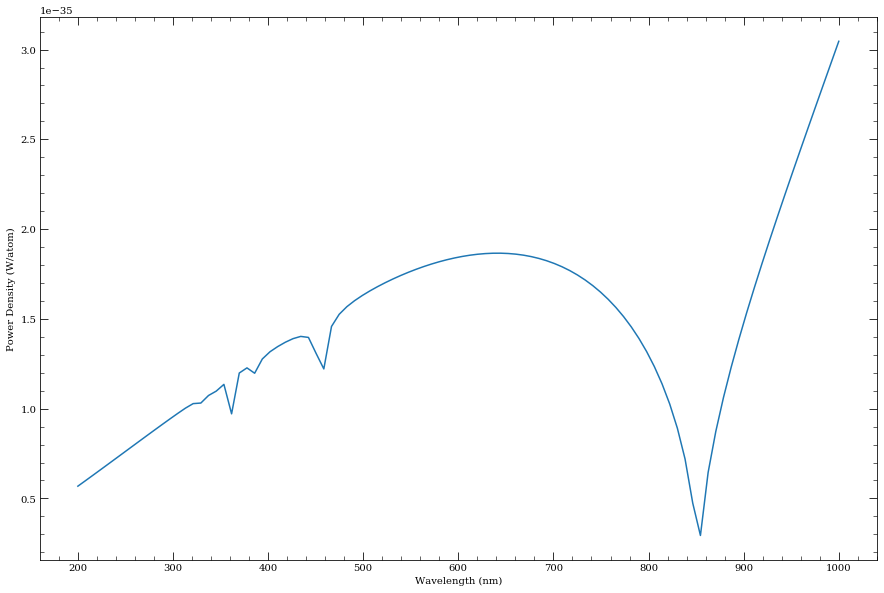

In [27]:
wvlns=wavelengths*1000000000
plt.plot(wvlns,p_cs)
# plt.title('Power Necessary to Trap Cesium at various wavelengths')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Power Density (W/atom)")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()


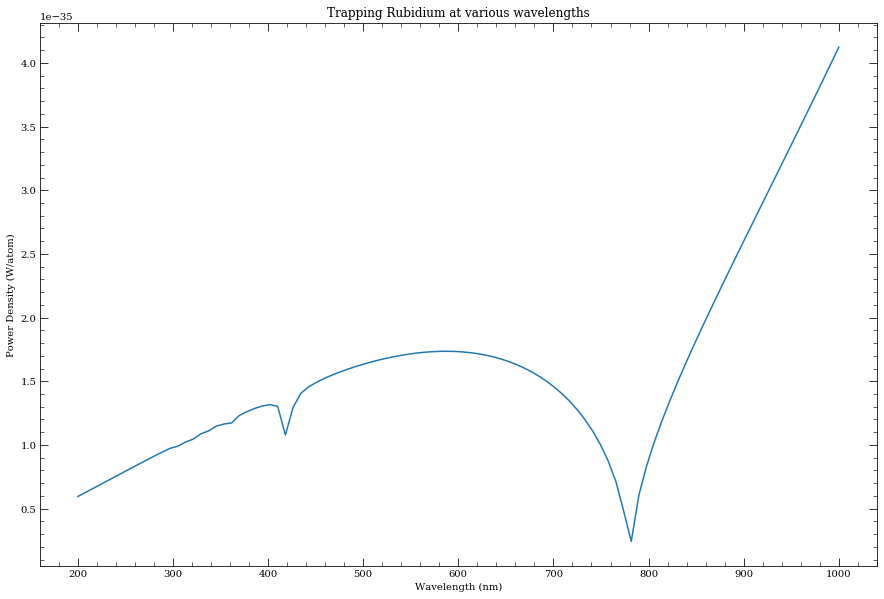

In [28]:
wvlns=wavelengths*1000000000
plt.plot(wvlns,p_rb)
plt.title('Trapping Rubidium at various wavelengths')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Power Density (W/atom)")
plt.rcParams['figure.figsize'] = [15, 10]


<function print>

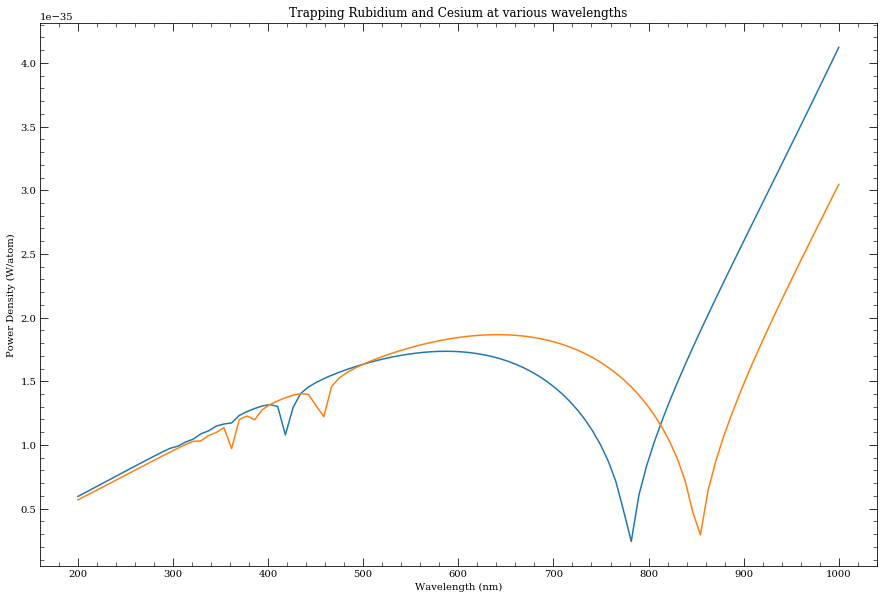

In [29]:
wvlns=wavelengths*1000000000
plt.plot(wvlns,p_rb)
plt.plot(wvlns,p_cs)

plt.title('Trapping Rubidium and Cesium at various wavelengths')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Power Density (W/atom)")
plt.rcParams['figure.figsize'] = [15, 10]
print


From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not tri

From: 600.5 to 2011.5
Wvln: 3.2257620819026417e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2111.5
Wvln: 3.221061783423047e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2211.5
Wvln: 3.217116051882545e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangula

From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2011.5
Wvln: 3.2257620819026417e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2111.5
Wvln: 3.221061783423047e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not

From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2011.5
Wvln: 3.2257620819026417e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2111.5
Wvln: 3.221061783423047e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not

From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2011.5
Wvln: 3.2257620819026417e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not

From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not t

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbo

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.31409199

From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not

From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol 

From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not 

From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol 

From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.25762687

From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.27142810

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.31409199

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not t

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2211.5
Wvln: 3.217116051882545e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2111.5
Wvln: 3.221061783423047e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2211.5
Wvln: 3.217116051882545e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not tr

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2011.5
Wvln: 3.2257620819026417e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2111.5
Wvln: 3.221061783423047e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2211.5
Wvln: 3.217116

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2011.5
Wvln: 3.22576208

From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1911.5
Wvln: 3.2314234769307127e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1711.5
Wvln: 3.246873835633732e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1811.5
Wvln: 3.23832878119711e-07
6j-Symbol is not triangular!
6j-Symbol is not t

From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1611.5
Wvln: 3.257626874305657e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1511.5
Wvln: 3.271428106375036e-07
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.31409199

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1211.5
Wvln: 3.348474967347318e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1311.5
Wvln: 3.3140919917262387e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1411.5
Wvln: 3.28956434186693e-07
6j-Symbol is not triangular!
6j-Symbol is not 

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1011.5
Wvln: 3.477815591420838e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 1111.5
Wvln: 3.398953206086976e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol

6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2211.5
Wvln: 3.217116051882545e-07
From: 600.5 to 611.5
Wvln: 8.523473060245015e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 711.5
Wvln: 4.556556792845617e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 811.5
Wvln: 3.877245321293302e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 911.5
Wvln: 3.6124992311015295e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!

6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2111.5
Wvln: 3.221061783423047e-07
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
6j-Symbol is not triangular!
From: 600.5 to 2211.5
Wvln: 3.217116051882545e-07


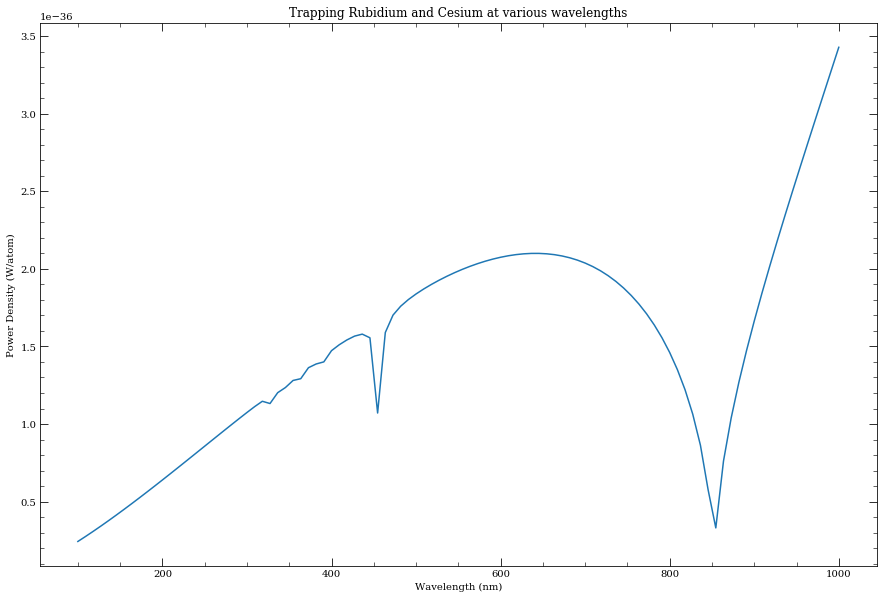

In [12]:
# +1 Polarization
#CESIUM 6S to 7P transition
wavelengths = np.linspace(.0000001,.000001,100)
wvlns=wavelengths*1000000000

k = Potassium()
k_t = Transition(State(4,0,1/2,1/2),State(5,1,3/2,3/2),k,None)
p_k = createSpectrum(cs_t.s1,wavelengths,st,cs)
plt.plot(wvlns,p_k)
plt.title('Trapping Rubidium and Cesium at various wavelengths')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Power Density (W/atom)")
plt.rcParams['figure.figsize'] = [15, 10]


In [ ]:
compare to actual results